# Combined labels for both cells and nuclei for lymph_node_s0
# Version with late fusion PCA

In [1]:
slide_id = "lymph_node_s0"

In [2]:
import pandas as pd
import scanpy as sc
import spatialdata as sd
import numpy as np
import anndata as ad
from spatialdata.models import get_table_keys
from matplotlib.colors import to_rgba
from functools import partial
from matplotlib import colors
import gc

## 1. Load the data

In [3]:
sdata_final = sd.read_zarr(f"/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/sdata_final/sdata_{slide_id}.zarr", selection=('tables',))

cellid2transcript_cat = dict(sdata_final.tables['table_cells'].obs[['cell_id', 'transcript_cat']].values)

cellid2nucleilabel = dict(sdata_final.tables['table_nuclei'].obs[['cell_id', 'final_label']].values)
cellid2celllabel = dict(sdata_final.tables['table_cells'].obs[['cell_id', 'final_label']].values)

cellid2nucleilabel1 = dict(sdata_final.tables['table_nuclei'].obs[['cell_id', 'label1']].values)
cellid2celllabel1 = dict(sdata_final.tables['table_cells'].obs[['cell_id', 'label1']].values)

del sdata_final
gc.collect()

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


1226

In [4]:
sdata_processed = sd.read_zarr(f"/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/sdata_processed/sdata_{slide_id}.zarr", selection=('tables',))
sdata_processed

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


SpatialData object, with associated Zarr store: /Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/sdata_processed/sdata_lymph_node_s0.zarr
└── Tables
      ├── 'table_cells': AnnData (702300, 4624)
      └── 'table_nuclei': AnnData (702300, 7053)
with coordinate systems:

with the following elements in the Zarr store but not in the SpatialData object:
    ▸ morpho (Images)
    ▸ st (Points)
    ▸ nucleus_boundaries (Shapes)
    ▸ cell_boundaries (Shapes)
    ▸ he (Images)

In [5]:
adata_nuclei_ini = sdata_processed.tables['table_nuclei'].copy()
adata_nuclei_ini

AnnData object with n_obs × n_vars = 702300 × 7053
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram'
    uns: 'sopa_attrs', 'spatialdata_attrs'
    obsm: 'spatial', 'tangram_pred'

In [6]:
adata_nuclei_ini.var

Empty DataFrame
Columns: []
Index: [A2ML1, AAMP, AAR2, AARSD1, ABAT, ABCA1, ABCA3, ABCA4, ABCB1, ABCB4, ABCB6, ABCC1, ABCC12, ABCC2, ABCC3, ABCC4, ABCC6, ABCC8, ABCC9, ABCD1, ABCD3, ABCD4, ABCF3, ABCG1, ABCG2, ABHD11, ABHD6, ABI3BP, ABL1, ABL2, ABO, ABTB1, ACAA2, ACACA, ACACB, ACAP1, ACAP2, ACAT1, ACE, ACE2, ACHE, ACKR3, ACLY, ACOD1, ACP5, ACPP, ACRBP, ACRV1, ACSL4, ACTBL2, ACTL6A, ACTL7A, ACTN1, ACTN2, ACTN4, ACVR1, ACVR1B, ACVR2A, ACVRL1, ACYP2, ADA, ADAM10, ADAM12, ADAM17, ADAM28, ADAM33, ADAM8, ADAM9, ADAMDEC1, ADAMTS1, ADAMTS4, ADAMTS5, ADAR, ADCY2, ADCYAP1, ADD1, ADGRA1, ADGRA2, ADGRA3, ADGRB1, ADGRD1, ADGRE2, ADGRE5, ADGRL4, ADIPOQ, ADIPOR1, ADIPOR2, ADM, ADNP, ADORA1, ADORA2A, ADORA2B, ADORA3, ADRA1A, ADRA1B, ADRA1D, ADRA2A, ADRA2B, ADRA2C, ADRB1, ...]

[7053 rows x 0 columns]

In [7]:
adata_cells_ini = sdata_processed.tables['table_cells'].copy()
adata_cells_ini

AnnData object with n_obs × n_vars = 702300 × 4624
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'region', 'z_level'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'

In [8]:
adata_cells_ini.var

gene_ids    feature_types   genome
A2ML1    ENSG00000166535  Gene Expression  Unknown
AAMP     ENSG00000127837  Gene Expression  Unknown
AAR2     ENSG00000131043  Gene Expression  Unknown
AARSD1   ENSG00000266967  Gene Expression  Unknown
ABAT     ENSG00000183044  Gene Expression  Unknown
...                  ...              ...      ...
ZSCAN26  ENSG00000197062  Gene Expression  Unknown
ZSWIM6   ENSG00000130449  Gene Expression  Unknown
ZUP1     ENSG00000153975  Gene Expression  Unknown
ZYG11B   ENSG00000162378  Gene Expression  Unknown
ZYX      ENSG00000159840  Gene Expression  Unknown

[4624 rows x 3 columns]

In [9]:
# Clean memory
del sdata_processed
gc.collect()

154

## 2. Get adata_nuclei and adata_cyto

In [10]:
adata_cells_ini = adata_cells_ini[adata_cells_ini.obs["transcript_counts"]>10].copy()  # Filter cells with less than 10 transcripts
len(adata_cells_ini.obs)

698216

In [11]:
# Align the cell_id in both AnnData objects
# Create a mapping of cell_id to index position in both objects
nuclei_idx = adata_nuclei_ini.obs.set_index('cell_id').index
cells_idx = adata_cells_ini.obs.set_index('cell_id').index

# Find the intersection of cell_id in both datasets
common_cells = nuclei_idx.intersection(cells_idx)
print(f"Number of common cell_ids: {len(common_cells)}")

# Subset both AnnData objects to include only common cell_ids
adata_nuclei = adata_nuclei_ini[adata_nuclei_ini.obs['cell_id'].isin(common_cells)]
adata_cells = adata_cells_ini[adata_cells_ini.obs['cell_id'].isin(common_cells)]

# Merge the 'obs' dataframes based on 'cell_id' to ensure the same order in both
obs_nuclei = adata_nuclei.obs[['cell_id']].reset_index(drop=True)
obs_cells = adata_cells.obs[['cell_id']].reset_index(drop=True)

# Ensure that both are in the same order
adata_nuclei = adata_nuclei[obs_nuclei['cell_id'].argsort().values]
adata_cells = adata_cells[obs_cells['cell_id'].argsort().values]

# Check that the cell_ids match now
assert np.array_equal(adata_nuclei.obs['cell_id'].values, adata_cells.obs['cell_id'].values), "Cell IDs do not match after alignment."

# Find common genes
common_genes = adata_nuclei.var_names.intersection(adata_cells.var_names)
print(f"Number of common genes: {len(common_genes)}")

# Subset both AnnData objects to include only the common genes
adata_nuclei = adata_nuclei[:, common_genes]
adata_cells = adata_cells[:, common_genes]

# Remove nucleus RNA from cell RNA to get the cytoplasmic RNA
X_cyto = adata_cells.X - adata_nuclei.X

# Because of slight mismatches or rounding, some entries might go negative by 1 or 2 in real data. So we clip to 0:
X_cyto.data = np.clip(X_cyto.data, a_min=0, a_max=None)

# Create a new AnnData object with the cytoplasmic RNA
adata_cyto = ad.AnnData(
    X=X_cyto,
    obs=adata_cells.obs.copy(),  # or adata_nuclei.obs, they should be the same set
    var=adata_cells.var.copy()   # same genes as well
)

Number of common cell_ids: 698216
Number of common genes: 4621


In [12]:
adata_nuclei.obs["transcript_counts"] = adata_nuclei.X.sum(axis=1)
adata_nuclei.obs

/var/folders/ff/llzyqd_s78v1k8vywvjxp5_r0000gn/T/ipykernel_97168/547616959.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_nuclei.obs["transcript_counts"] = adata_nuclei.X.sum(axis=1)


region   slide     cell_id       area  \
aaaaaaaa-1  nucleus_boundaries  morpho  aaaaaaaa-1  44.569126   
aaaaaaab-1  nucleus_boundaries  morpho  aaaaaaab-1  20.071997   
aaaaaaac-1  nucleus_boundaries  morpho  aaaaaaac-1  26.416594   
aaaaaaad-1  nucleus_boundaries  morpho  aaaaaaad-1  21.200974   
aaaaaaae-1  nucleus_boundaries  morpho  aaaaaaae-1  22.329712   
...                        ...     ...         ...        ...   
aaaklhfh-1  nucleus_boundaries  morpho  aaaklhfh-1  18.333292   
aaaklhfi-1  nucleus_boundaries  morpho  aaaklhfi-1  11.695614   
aaaklhfj-1  nucleus_boundaries  morpho  aaaklhfj-1   6.322290   
aaaklhfk-1  nucleus_boundaries  morpho  aaaklhfk-1  11.764376   
aaaklhfl-1  nucleus_boundaries  morpho  aaaklhfl-1   7.563672   

                                  ct_tangram  transcript_counts  
aaaaaaaa-1  Intermediate EPCAM+ erythroblast                148  
aaaaaaab-1    S100A+ preNeutrophil (cycling)                189  
aaaaaaac-1                Gamma-delta T cell                208  
aaaaaaad-1         pre-pDC (lymphoid origin)                200  
aaaaaaae-1               preB cell (cycling)                222  
...                                      ...                ...  
aaaklhfh-1           Tissue-resident NK cell                 80  
aaaklhfi-1                              MAIT                116  
aaaklhfj-1  Intermediate EPCAM+ erythroblast                 36  
aaaklhfk-1                        Fibroblast                 20  
aaaklhfl-1           CD14+MHCIIhigh monocyte                 66  

[698216 rows x 6 columns]

In [13]:
adata_cyto.obs["transcript_counts"] = adata_cyto.X.sum(axis=1).astype(int)
adata_cyto.obs

cell_id  transcript_counts  control_probe_counts  \
0       aaaaaaaa-1                138                     0   
1       aaaaaaab-1                140                     0   
2       aaaaaaac-1                148                     0   
3       aaaaaaad-1                 72                     0   
5       aaaaaaae-1                 39                     0   
...            ...                ...                   ...   
708978  aaaklhfh-1                 15                     0   
708979  aaaklhfi-1                 11                     0   
708980  aaaklhfj-1                  8                     0   
708981  aaaklhfk-1                  1                     0   
708982  aaaklhfl-1                  3                     0   

        genomic_control_counts  control_codeword_counts  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
5                            0                        0   
...                        ...                      ...   
708978                       0                        0   
708979                       0                        0   
708980                       0                        0   
708981                       0                        0   
708982                       0                        0   

        unassigned_codeword_counts  deprecated_codeword_counts  total_counts  \
0                                0                           0           271   
1                                0                           0           315   
2                                0                           0           337   
3                                0                           0           235   
5                                0                           0           216   
...                            ...                         ...           ...   
708978                           0                           0            92   
708979                           0                           0           118   
708980                           0                           0            43   
708981                           0                           0            20   
708982                           0                           0            55   

        cell_area  nucleus_area  nucleus_count  \
0       87.332191     46.646408            1.0   
1       43.530627     21.900782            1.0   
2       58.206408     27.996876            1.0   
3       34.273595     23.120001            1.0   
5       35.312189     23.842501            1.0   
...           ...           ...            ...   
708978  19.823594     19.823594            1.0   
708979  13.095313     13.095313            1.0   
708980   7.676563      7.676563            1.0   
708981  13.275938     13.275938            1.0   
708982   8.534532      8.534532            1.0   

                                      segmentation_method       region  \
0       Segmented by boundary stain (ATP1A1+CD45+E-Cad...  cell_labels   
1       Segmented by boundary stain (ATP1A1+CD45+E-Cad...  cell_labels   
2       Segmented by boundary stain (ATP1A1+CD45+E-Cad...  cell_labels   
3       Segmented by boundary stain (ATP1A1+CD45+E-Cad...  cell_labels   
5       Segmented by boundary stain (ATP1A1+CD45+E-Cad...  cell_labels   
...                                                   ...          ...   
708978            Segmented by nucleus expansion of 5.0µm  cell_labels   
708979            Segmented by nucleus expansion of 5.0µm  cell_labels   
708980            Segmented by nucleus expansion of 5.0µm  cell_labels   
708981            Segmented by nucleus expansion of 5.0µm  cell_labels   
708982            Segmented by nucleus expansion of 5.0µm  cell_labels   

        z_level  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
5   

In [14]:
adata_cells_ini.obs

cell_id  transcript_counts  control_probe_counts  \
0       aaaaaaaa-1                271                     0   
1       aaaaaaab-1                315                     0   
2       aaaaaaac-1                337                     0   
3       aaaaaaad-1                235                     0   
5       aaaaaaae-1                216                     0   
...            ...                ...                   ...   
708978  aaaklhfh-1                 92                     0   
708979  aaaklhfi-1                118                     0   
708980  aaaklhfj-1                 43                     0   
708981  aaaklhfk-1                 20                     0   
708982  aaaklhfl-1                 55                     0   

        genomic_control_counts  control_codeword_counts  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
5                            0                        0   
...                        ...                      ...   
708978                       0                        0   
708979                       0                        0   
708980                       0                        0   
708981                       0                        0   
708982                       0                        0   

        unassigned_codeword_counts  deprecated_codeword_counts  total_counts  \
0                                0                           0           271   
1                                0                           0           315   
2                                0                           0           337   
3                                0                           0           235   
5                                0                           0           216   
...                            ...                         ...           ...   
708978                           0                           0            92   
708979                           0                           0           118   
708980                           0                           0            43   
708981                           0                           0            20   
708982                           0                           0            55   

        cell_area  nucleus_area  nucleus_count  \
0       87.332191     46.646408            1.0   
1       43.530627     21.900782            1.0   
2       58.206408     27.996876            1.0   
3       34.273595     23.120001            1.0   
5       35.312189     23.842501            1.0   
...           ...           ...            ...   
708978  19.823594     19.823594            1.0   
708979  13.095313     13.095313            1.0   
708980   7.676563      7.676563            1.0   
708981  13.275938     13.275938            1.0   
708982   8.534532      8.534532            1.0   

                                      segmentation_method       region  \
0       Segmented by boundary stain (ATP1A1+CD45+E-Cad...  cell_labels   
1       Segmented by boundary stain (ATP1A1+CD45+E-Cad...  cell_labels   
2       Segmented by boundary stain (ATP1A1+CD45+E-Cad...  cell_labels   
3       Segmented by boundary stain (ATP1A1+CD45+E-Cad...  cell_labels   
5       Segmented by boundary stain (ATP1A1+CD45+E-Cad...  cell_labels   
...                                                   ...          ...   
708978            Segmented by nucleus expansion of 5.0µm  cell_labels   
708979            Segmented by nucleus expansion of 5.0µm  cell_labels   
708980            Segmented by nucleus expansion of 5.0µm  cell_labels   
708981            Segmented by nucleus expansion of 5.0µm  cell_labels   
708982            Segmented by nucleus expansion of 5.0µm  cell_labels   

        z_level  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
5   

In [15]:
adata_nuclei.var

Empty DataFrame
Columns: []
Index: [A2ML1, AAMP, AAR2, AARSD1, ABAT, ABCA1, ABCA3, ABCA4, ABCB1, ABCB4, ABCB6, ABCC1, ABCC12, ABCC2, ABCC3, ABCC4, ABCC6, ABCC8, ABCC9, ABCD1, ABCD3, ABCD4, ABCF3, ABCG1, ABCG2, ABHD11, ABHD6, ABI3BP, ABL1, ABL2, ABO, ABTB1, ACAA2, ACACA, ACACB, ACAP1, ACAP2, ACAT1, ACE, ACE2, ACHE, ACKR3, ACLY, ACOD1, ACP5, ACPP, ACRBP, ACRV1, ACSL4, ACTBL2, ACTL6A, ACTL7A, ACTN1, ACTN2, ACTN4, ACVR1, ACVR1B, ACVR2A, ACVRL1, ACYP2, ADA, ADAM10, ADAM12, ADAM17, ADAM28, ADAM33, ADAM8, ADAM9, ADAMDEC1, ADAMTS1, ADAMTS4, ADAMTS5, ADAR, ADCY2, ADCYAP1, ADD1, ADGRA1, ADGRA2, ADGRA3, ADGRB1, ADGRD1, ADGRE2, ADGRE5, ADGRL4, ADIPOQ, ADIPOR1, ADIPOR2, ADM, ADNP, ADORA1, ADORA2A, ADORA2B, ADORA3, ADRA1A, ADRA1B, ADRA1D, ADRA2A, ADRA2B, ADRA2C, ADRB1, ...]

[4621 rows x 0 columns]

In [16]:
adata_cyto.var

gene_ids    feature_types   genome
A2ML1    ENSG00000166535  Gene Expression  Unknown
AAMP     ENSG00000127837  Gene Expression  Unknown
AAR2     ENSG00000131043  Gene Expression  Unknown
AARSD1   ENSG00000266967  Gene Expression  Unknown
ABAT     ENSG00000183044  Gene Expression  Unknown
...                  ...              ...      ...
ZSCAN26  ENSG00000197062  Gene Expression  Unknown
ZSWIM6   ENSG00000130449  Gene Expression  Unknown
ZUP1     ENSG00000153975  Gene Expression  Unknown
ZYG11B   ENSG00000162378  Gene Expression  Unknown
ZYX      ENSG00000159840  Gene Expression  Unknown

[4621 rows x 3 columns]

In [17]:
# Temporary saving adata_nuclei, adata_nuclei_ini, adata_cyto and adata_cells
adata_nuclei.write_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_nuclei_{slide_id}.h5ad")
adata_nuclei_ini.write_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_nuclei_ini_{slide_id}.h5ad")
adata_cyto.write_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_cyto_{slide_id}.h5ad")
adata_cells.write_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_cells_{slide_id}.h5ad")

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/anndata/_core/anndata.py:1145: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/anndata/_core/anndata.py:1145: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/anndata/_core/anndata.py:1145: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


In [18]:
# Clean memory
del adata_nuclei_ini, adata_cyto, adata_cells, adata_cells_ini
gc.collect()

326

## 3. Separated PCA

##### Nuclei :

In [ ]:
#adata_nuclei = sc.read_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_nuclei_{slide_id}.h5ad")

In [ ]:
# # Preprocess the data
# sc.pp.normalize_total(adata_nuclei, target_sum=1e4)
# sc.pp.log1p(adata_nuclei)

In [ ]:
# # Scale each gene to unit variance. Clip values exceeding standard deviation 10.
# sc.pp.scale(adata_nuclei, max_value=10)

In [ ]:
# # Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.
# sc.tl.pca(adata_nuclei, svd_solver="arpack", use_highly_variable=False)

In [4]:
adata_nuclei = sc.read_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_pca_nuclei_{slide_id}.h5ad")

In [5]:
# Contribution of single PCs to the total variance in the data
# This gives us information about how many PCs we should consider in order to compute the neighborhood relations of cells, e.g. used in the clustering function  `sc.tl.louvain()` or tSNE `sc.tl.tsne()`
sc.pl.pca_variance_ratio(adata_nuclei, log=True)

In [6]:
adata_nuclei

AnnData object with n_obs × n_vars = 698216 × 4621
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts'
    var: 'mean', 'std'
    uns: 'log1p', 'pca', 'sopa_attrs', 'spatialdata_attrs'
    obsm: 'X_pca', 'spatial', 'tangram_pred'
    varm: 'PCs'

In [7]:
# Group the PCs into a single AnnData object
X_nuc_pca = adata_nuclei.obsm["X_pca"][:, :21]

# As in MFA, divide the PCs by the square root of the maximal eigenvalue for each dataset separately
X_nuc_pca /= np.sqrt(np.max(adata_nuclei.uns["pca"]["variance"]))

# Save obs
nuclei_obs_all = adata_nuclei.obs.copy()

In [8]:
# Check var of first PC for each table is 1
print(np.var(adata_nuclei.obsm["X_pca"][:, 0]))

1.0000429


In [9]:
# Have a look to all the PCs var in the combined data
print("Nuc:")
for i in range(21):
    print(f"PC {i} variance: {np.var(adata_nuclei.obsm['X_pca'][:, i])}")

Nuc:
PC 0 variance: 1.0000429153442383
PC 1 variance: 0.6937708854675293
PC 2 variance: 0.44791722297668457
PC 3 variance: 0.34720638394355774
PC 4 variance: 0.2930983304977417
PC 5 variance: 0.20952463150024414
PC 6 variance: 0.1683807224035263
PC 7 variance: 0.13851423561573029
PC 8 variance: 0.13563509285449982
PC 9 variance: 0.1199943944811821
PC 10 variance: 0.10719084739685059
PC 11 variance: 0.1011919379234314
PC 12 variance: 0.08678928017616272
PC 13 variance: 0.0762251615524292
PC 14 variance: 0.07236369699239731
PC 15 variance: 0.0683051347732544
PC 16 variance: 0.06514221429824829
PC 17 variance: 0.06362147629261017
PC 18 variance: 0.06142236664891243
PC 19 variance: 0.05850616469979286
PC 20 variance: 0.05670205503702164


In [10]:
# Clean memory
del adata_nuclei
gc.collect()

5425

##### Cyto :

In [11]:
# adata_cyto = sc.read_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_cyto_{slide_id}.h5ad")

In [ ]:
# # Preprocess the data
# sc.pp.normalize_total(adata_cyto, target_sum=1e4)
# sc.pp.log1p(adata_cyto)

In [ ]:
# # Scale each gene to unit variance. Clip values exceeding standard deviation 10.
# sc.pp.scale(adata_cyto, max_value=10)

In [ ]:
# # Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.
# sc.tl.pca(adata_cyto, svd_solver="arpack", use_highly_variable=False)

In [12]:
adata_cyto = sc.read_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_pca_cyto_{slide_id}.h5ad")

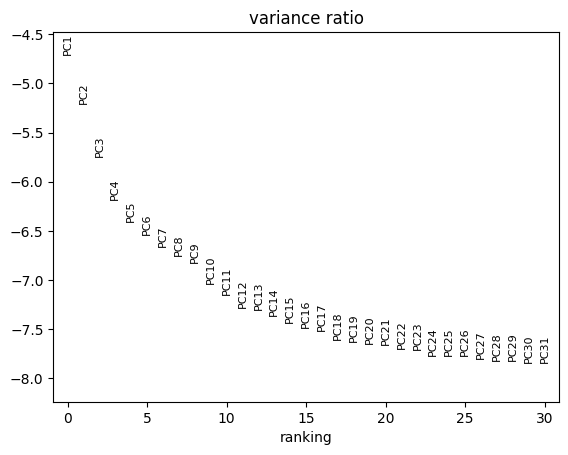

In [13]:
# Contribution of single PCs to the total variance in the data
# This gives us information about how many PCs we should consider in order to compute the neighborhood relations of cells, e.g. used in the clustering function  `sc.tl.louvain()` or tSNE `sc.tl.tsne()`
sc.pl.pca_variance_ratio(adata_cyto, log=True)

In [14]:
adata_cyto

AnnData object with n_obs × n_vars = 698216 × 4621
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'region', 'z_level'
    var: 'gene_ids', 'feature_types', 'genome', 'mean', 'std'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [15]:
# Group the PCs into a single AnnData object
X_cyto_pca = adata_cyto.obsm["X_pca"][:, :18]

# As in MFA, divide the PCs by the square root of the maximal eigenvalue for each dataset separately
X_cyto_pca /= np.sqrt(np.max(adata_cyto.uns["pca"]["variance"]))

# Check that obs_names align
assert np.array_equal(nuclei_obs_all['cell_id'].values, adata_cyto.obs['cell_id'].values), "Cell IDs do not match"

# Concatenate along columns (features) and keep only informative PCs
X_combined = np.concatenate([X_nuc_pca, X_cyto_pca], axis=1)

# Create a new AnnData to store these fused PCs
adata_combined = ad.AnnData(X=X_combined, obs=nuclei_obs_all.copy())

# Name the columns
adata_combined.var_names = [f"PC_nuc_{i}" for i in range(len(X_nuc_pca[0]))] + [f"PC_cyto_{i}" for i in range(len(X_cyto_pca[0]))]

In [16]:
# Check var of first PC for each table is 1
print(np.var(adata_cyto.obsm["X_pca"][:, 0]))

1.0000484


In [17]:
# Have a look to all the PCs var in the combined data
print("Cyto:")
for i in range(18):
    print(f"PC {i} variance: {np.var(adata_cyto.obsm['X_pca'][:, i])}")

Cyto:
PC 0 variance: 1.0000483989715576
PC 1 variance: 0.608345091342926
PC 2 variance: 0.3554415702819824
PC 3 variance: 0.2296157330274582
PC 4 variance: 0.18412446975708008
PC 5 variance: 0.16064949333667755
PC 6 variance: 0.1423300951719284
PC 7 variance: 0.13075479865074158
PC 8 variance: 0.1207924485206604
PC 9 variance: 0.0980726033449173
PC 10 variance: 0.08748283237218857
PC 11 variance: 0.07693877816200256
PC 12 variance: 0.0752422884106636
PC 13 variance: 0.07053321599960327
PC 14 variance: 0.06591887772083282
PC 15 variance: 0.06285005807876587
PC 16 variance: 0.060567229986190796
PC 17 variance: 0.055575892329216


In [18]:
# Clean memory
del adata_cyto
gc.collect()

0

In [19]:
# Add final labels coming from table nuclei and table cells

adata_combined.obs['transcript_cat'] = adata_combined.obs['cell_id'].map(cellid2transcript_cat).fillna('Unknown')

adata_combined.obs['final_label_nuclei'] = adata_combined.obs['cell_id'].map(cellid2nucleilabel).fillna('Unknown')
adata_combined.obs['final_label_cells'] = adata_combined.obs['cell_id'].map(cellid2celllabel).fillna('Unknown')

adata_combined.obs['label1_nuclei'] = adata_combined.obs['cell_id'].map(cellid2nucleilabel1).fillna('Unknown')
adata_combined.obs['label1_cells'] = adata_combined.obs['cell_id'].map(cellid2celllabel1).fillna('Unknown')

adata_combined.obs

region   slide     cell_id       area  \
aaaaaaaa-1  nucleus_boundaries  morpho  aaaaaaaa-1  44.569126   
aaaaaaab-1  nucleus_boundaries  morpho  aaaaaaab-1  20.071997   
aaaaaaac-1  nucleus_boundaries  morpho  aaaaaaac-1  26.416594   
aaaaaaad-1  nucleus_boundaries  morpho  aaaaaaad-1  21.200974   
aaaaaaae-1  nucleus_boundaries  morpho  aaaaaaae-1  22.329712   
...                        ...     ...         ...        ...   
aaaklhfh-1  nucleus_boundaries  morpho  aaaklhfh-1  18.333292   
aaaklhfi-1  nucleus_boundaries  morpho  aaaklhfi-1  11.695614   
aaaklhfj-1  nucleus_boundaries  morpho  aaaklhfj-1   6.322290   
aaaklhfk-1  nucleus_boundaries  morpho  aaaklhfk-1  11.764376   
aaaklhfl-1  nucleus_boundaries  morpho  aaaklhfl-1   7.563672   

                                  ct_tangram  transcript_counts  \
aaaaaaaa-1  Intermediate EPCAM+ erythroblast                148   
aaaaaaab-1    S100A+ preNeutrophil (cycling)                189   
aaaaaaac-1                Gamma-delta T cell                208   
aaaaaaad-1         pre-pDC (lymphoid origin)                200   
aaaaaaae-1               preB cell (cycling)                222   
...                                      ...                ...   
aaaklhfh-1           Tissue-resident NK cell                 80   
aaaklhfi-1                              MAIT                116   
aaaklhfj-1  Intermediate EPCAM+ erythroblast                 36   
aaaklhfk-1                        Fibroblast                 20   
aaaklhfl-1           CD14+MHCIIhigh monocyte                 66   

            transcript_cat        final_label_nuclei  \
aaaaaaaa-1               3                   Myeloid   
aaaaaaab-1               4                      T_NK   
aaaaaaac-1               5                      T_NK   
aaaaaaad-1               3                   Myeloid   
aaaaaaae-1               2                  B_Plasma   
...                    ...                       ...   
aaaklhfh-1               0              Blood_vessel   
aaaklhfi-1               1  Fibroblast_Myofibroblast   
aaaklhfj-1               0                      T_NK   
aaaklhfk-1               0                   Unknown   
aaaklhfl-1               0  Fibroblast_Myofibroblast   

                   final_label_cells        label1_nuclei  \
aaaaaaaa-1                   Myeloid  Monocyte/Macrophage   
aaaaaaab-1                      T_NK                    T   
aaaaaaac-1                      T_NK                    T   
aaaaaaad-1                   Myeloid                  pDC   
aaaaaaae-1                  B_Plasma                    B   
...                              ...                  ...   
aaaklhfh-1              Blood_vessel          Endothelial   
aaaklhfi-1  Fibroblast_Myofibroblast           Fibroblast   
aaaklhfj-1                   Unknown                    T   
aaaklhfk-1                   Unknown              Unknown   
aaaklhfl-1  Fibroblast_Myofibroblast           Fibroblast   

                      label1_cells  
aaaaaaaa-1     Monocyte/Macrophage  
aaaaaaab-1                       T  
aaaaaaac-1                       T  
aaaaaaad-1  Monocyte/Macrophage/DC  
aaaaaaae-1                       B  
...                            ...  
aaaklhfh-1             Endothelial  
aaaklhfi-1              Fibroblast  
aaaklhfj-1                 Unknown  
aaaklhfk-1                 Unknown  
aaaklhfl-1              Fibroblast  

[698216 rows x 11 columns]

In [20]:
adata_combined

AnnData object with n_obs × n_vars = 698216 × 39
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts', 'transcript_cat', 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells'

In [21]:
adata_combined.var

Empty DataFrame
Columns: []
Index: [PC_nuc_0, PC_nuc_1, PC_nuc_2, PC_nuc_3, PC_nuc_4, PC_nuc_5, PC_nuc_6, PC_nuc_7, PC_nuc_8, PC_nuc_9, PC_nuc_10, PC_nuc_11, PC_nuc_12, PC_nuc_13, PC_nuc_14, PC_nuc_15, PC_nuc_16, PC_nuc_17, PC_nuc_18, PC_nuc_19, PC_nuc_20, PC_cyto_0, PC_cyto_1, PC_cyto_2, PC_cyto_3, PC_cyto_4, PC_cyto_5, PC_cyto_6, PC_cyto_7, PC_cyto_8, PC_cyto_9, PC_cyto_10, PC_cyto_11, PC_cyto_12, PC_cyto_13, PC_cyto_14, PC_cyto_15, PC_cyto_16, PC_cyto_17]

## 4. PCA on the two separated PCA (late fusion) + Clustering

In [22]:
# Run a "second PCA" on the scaled features
# No scaling because we already scaled using the maximum eigenvalue for each table
sc.tl.pca(adata_combined)

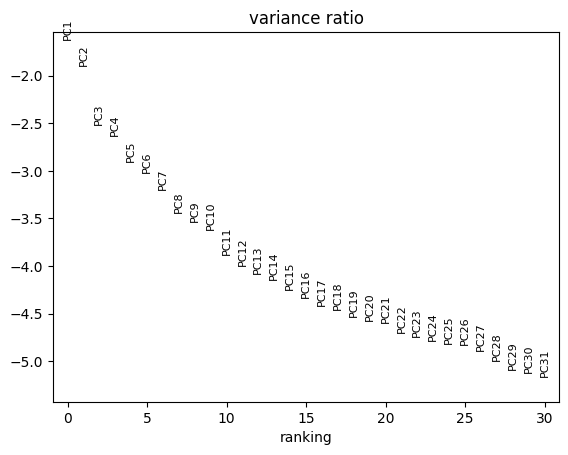

In [23]:
sc.pl.pca_variance_ratio(adata_combined, log=True)

In [24]:
adata_combined

AnnData object with n_obs × n_vars = 698216 × 39
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts', 'transcript_cat', 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [25]:
# Neighborhood graph of cells using the PCA representation of the data matrix
sc.pp.neighbors(adata_combined, n_neighbors=10, n_pcs=29, use_rep="X_pca", key_added='pca_n10_pcs29')
# Embedding the neighborhood graph using UMAP
sc.tl.umap(adata_combined, neighbors_key='pca_n10_pcs29')
# Leiden clustering directly clusters the neighborhood graph of cells
sc.tl.leiden(adata_combined, resolution=0.4, random_state=0, n_iterations=2, directed=False, key_added='pca_n10_pcs29_leiden_res0.4', neighbors_key='pca_n10_pcs29')
sc.tl.leiden(adata_combined, resolution=0.6, random_state=0, n_iterations=2, directed=False, key_added='pca_n10_pcs29_leiden_res0.6', neighbors_key='pca_n10_pcs29')
sc.tl.leiden(adata_combined, resolution=0.8, random_state=0, n_iterations=2, directed=False, key_added='pca_n10_pcs29_leiden_res0.8', neighbors_key='pca_n10_pcs29')

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/ff/llzyqd_s78v1k8vywvjxp5_r0000gn/T/ipykernel_12472/852845240.py:6: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_combined, resolution=0.4, random_state=0, n_iterations=2, directed=False, key_added='pca_n10_pcs29_leiden_res0.4', neighbors_key='pca_n10_pcs29')


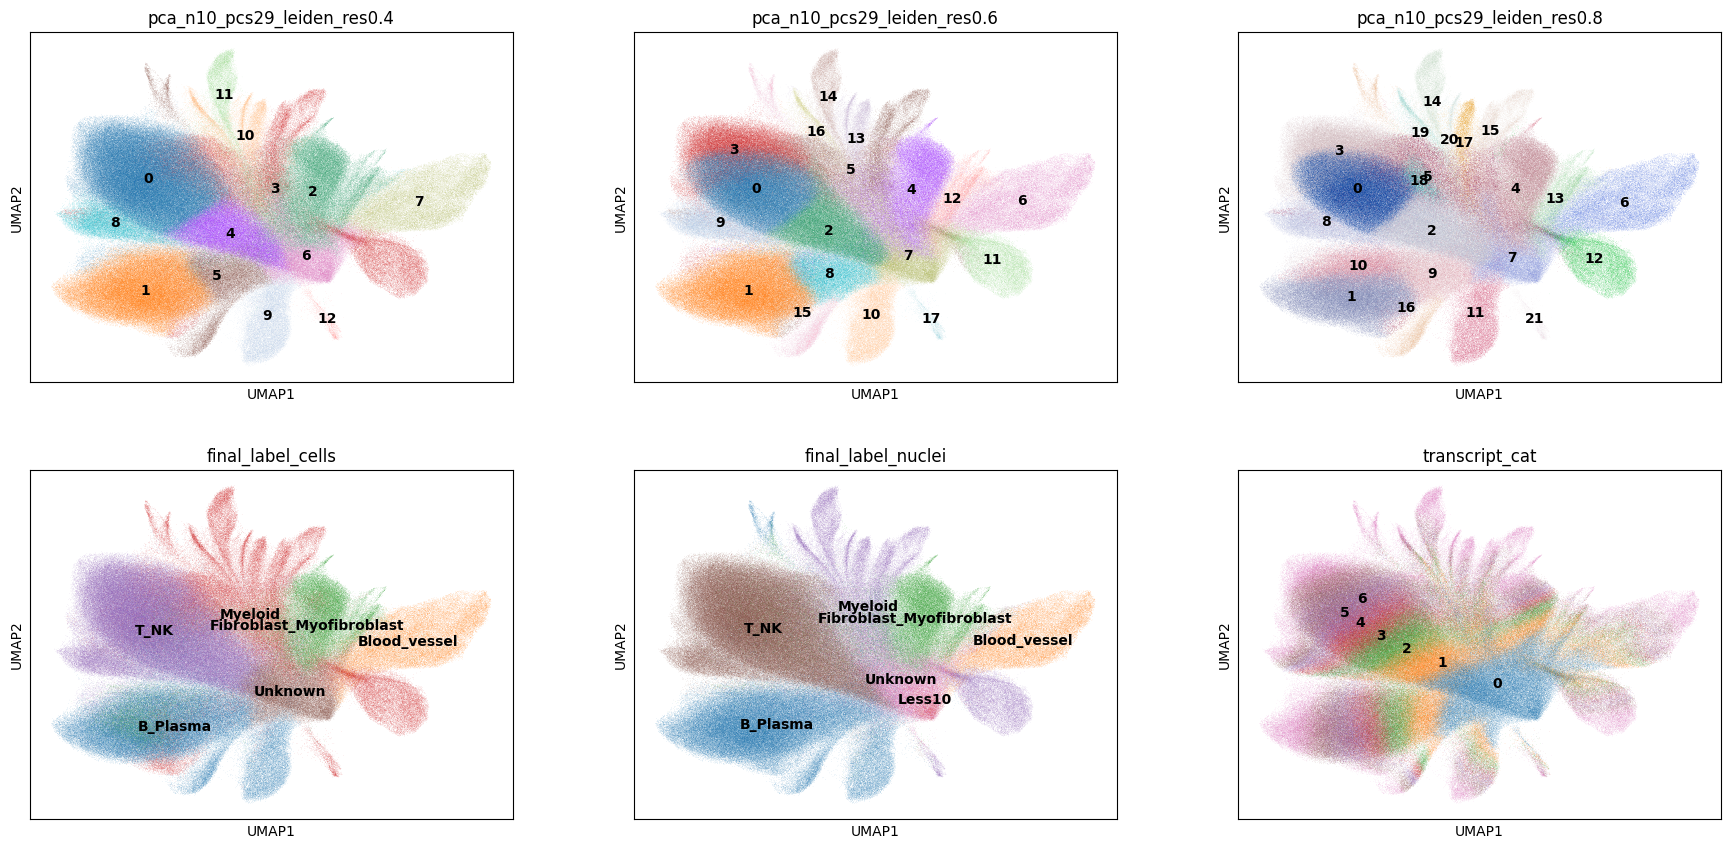

In [26]:
# Plot the clusters
adata_combined.obs['transcript_cat'] = pd.Categorical(adata_combined.obs['transcript_cat'])
sc.pl.umap(adata_combined, neighbors_key='pca_n10_pcs29',
           color=['pca_n10_pcs29_leiden_res0.4', 'pca_n10_pcs29_leiden_res0.6', 'pca_n10_pcs29_leiden_res0.8', 'final_label_cells', 'final_label_nuclei', 'transcript_cat'],
           ncols=3, legend_loc='on data')

In [27]:
clustering_label = 'pca_n10_pcs29_leiden_res0.4'

In [28]:
adata_cells = sc.read_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_cells_{slide_id}.h5ad")

In [29]:
# Put the clustering_label into the adata_cells to be able to use marker genes, and also final_label_cells and final_label_nuclei
cellid2clustering_label = dict(adata_combined.obs[['cell_id', clustering_label]].values)
adata_cells.obs["cluster_combined"] = adata_cells.obs['cell_id'].map(cellid2clustering_label).fillna('Unknown')
adata_cells.obs["final_label_cells"] = adata_cells.obs['cell_id'].map(cellid2celllabel).fillna('Unknown')
adata_cells.obs["final_label_nuclei"] = adata_cells.obs['cell_id'].map(cellid2nucleilabel).fillna('Unknown')


# Preprocess the adata_cells
sc.pp.normalize_total(adata_cells, target_sum=1e4)
sc.pp.log1p(adata_cells)

# Add X_umap to adata_cells, checking before cell_id alignment
assert np.array_equal(adata_cells.obs['cell_id'].values, adata_combined.obs['cell_id'].values), "Cell IDs do not match"
adata_cells.obsm['X_umap'] = adata_combined.obsm['X_umap']

# Wilcoxon rank-sum (Mann-Whitney-U) test. 
# You might also consider much more powerful differential testing packages like MAST, limma, DESeq2 and, for python, the recent diffxpy.
sc.tl.rank_genes_groups(adata_cells, "cluster_combined", method="wilcoxon", corr_method="benjamini-hochberg", key_added="rank_genes_"+"cluster_combined")
# The top ranked genes per cluster
top_ranked_genes = pd.DataFrame(adata_cells.uns["rank_genes_"+"cluster_combined"]["names"]).iloc[:7, :]
list_genes = pd.concat([top_ranked_genes[col] for col in top_ranked_genes], ignore_index=True).tolist()

python(14351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


## 5. Analyze and get combined labels

### Helper functions

In [30]:
def analyze_clusters(adata, resolution_key):
    
    # Ensure the resolution key exists in obs
    if resolution_key not in adata.obs:
        raise ValueError(f"{resolution_key} not found in adata.obs.")
    
    # Group data by the specified clustering resolution
    cluster_groups = adata.obs.groupby(resolution_key)

    results = {}

    for cluster_id, group in cluster_groups:
        
        # Calculate dominant labels for final_label_cells
        label_cells_counts = group['final_label_cells'].value_counts(normalize=True)
        dominant_cells = label_cells_counts.head(2) * 100  # Get top 2 labels as percentages

        # Calculate top1 for label1 for cells
        label1_cells_counts = group['label1_cells'].value_counts(normalize=True)
        top1_cells = label1_cells_counts.head(1) * 100

        # Calculate dominant labels for final_label_nuclei
        label_nuclei_counts = group['final_label_nuclei'].value_counts(normalize=True)
        dominant_nuclei = label_nuclei_counts.head(2) * 100  # Get top 2 labels as percentages

        # Calculate top1 for label1 for nuclei
        label1_nuclei_counts = group['label1_nuclei'].value_counts(normalize=True)
        top1_nuclei = label1_nuclei_counts.head(1) * 100
        if top1_nuclei.keys()[0] == 'less_10_rna':
            top1_nuclei = label1_nuclei_counts.head(2).tail(1) * 100
        
        # Align categories for comparison
        common_categories = group['final_label_cells'].cat.categories.union(group['final_label_nuclei'].cat.categories)
        group['final_label_cells'] = group['final_label_cells'].cat.set_categories(common_categories)
        group['final_label_nuclei'] = group['final_label_nuclei'].cat.set_categories(common_categories)

        # Count different labels between final_label_cells and final_label_nuclei
        total_cells = len(group)  # Total number of cells in the cluster
        differing_labels_count_woUnknown = ((group['final_label_cells'] != group['final_label_nuclei']) & (group['final_label_nuclei'] != 'Unknown')  & (group['final_label_nuclei'] != 'Less10')).sum() / total_cells * 100
        differing_labels_count = (group['final_label_cells'] != group['final_label_nuclei']).sum() / total_cells * 100

        # Store the results
        results[cluster_id] = (dominant_cells.to_dict(), dominant_nuclei.to_dict(), top1_cells.to_dict(), top1_nuclei.to_dict(), differing_labels_count_woUnknown, differing_labels_count)

    return results

In [31]:
def analyze_cluster_dominance(cluster_analysis_results):
    
    clusters_unknown_cells = []
    clusters_different_top1 = []
    clusters_high_diff = []

    for cluster_id, (dominant_cells, dominant_nuclei, label1_cells, label1_nuclei, diff_percentage_woUnknown, _) in cluster_analysis_results.items():
        
        # Check if top 1 dominant_cells is 'Unknown' or 'Less10'
        
        top1_dominant_cells = max(dominant_cells, key=dominant_cells.get)
        if top1_dominant_cells == 'Unknown' or top1_dominant_cells == 'Less10':
            clusters_unknown_cells.append(cluster_id)
        
        # Check if top 1 for dominant_cells is different from dominant_nuclei
        
        top1_dominant_nuclei = max(dominant_nuclei, key=dominant_nuclei.get)

        if top1_dominant_nuclei == 'Unknown' or top1_dominant_nuclei == 'Less10':
            sorted_nuclei = sorted(dominant_nuclei.items(), key=lambda x: x[1], reverse=True)
            if len(sorted_nuclei) > 1:  # Make sure there's a second element
                top1_dominant_nuclei = sorted_nuclei[1][0]

        if top1_dominant_cells != top1_dominant_nuclei:
            clusters_different_top1.append(cluster_id)
        
        # Check if diff_percentage_woUnknown is greater than 40%
        
        if diff_percentage_woUnknown > 40:
            clusters_high_diff.append(cluster_id)

    print(f"Clusters where the top 1 for dominant_cells is 'Unknown' or 'Less10': {clusters_unknown_cells}")
    print(f"Clusters where the top 1 for dominant_cells differs from dominant_nuclei (excluding 'Unknown' and 'Less10'): {clusters_different_top1}")
    print(f"Clusters where diff_percentage_woUnknown is greater than 40%: {clusters_high_diff}")

    print("=" * 50)

    clusters_to_analyse = set(clusters_unknown_cells + clusters_different_top1 + clusters_high_diff)
    for cluster_id in clusters_to_analyse:
        print(f"\nCluster ID: {cluster_id}")
        print(f"Dominant final_label_cells: {cluster_analysis_results[cluster_id][0]} - with dominant label1: {cluster_analysis_results[cluster_id][2]}")
        print(f"Dominant final_label_nuclei: {cluster_analysis_results[cluster_id][1]} - with dominant label1: {cluster_analysis_results[cluster_id][3]}")
        print(f"Count of differing labels without 'Unknown' or 'Less10' label for Nuclei: {round(cluster_analysis_results[cluster_id][4], 2)} %")
        print(f"Count of differing labels: {round(cluster_analysis_results[cluster_id][5], 2)} %")
        print(f"% of cells in cluster: {round(len(adata_combined.obs[adata_combined.obs[clustering_label] == cluster_id]) / len(adata_combined.obs) * 100, 2)} %")
        print("-----")

In [32]:
def assign_final_labels(cluster_analysis_results, input_dict):
    
    dict_combined_labels = {}

    for cluster_id, (dominant_cells, _, _, _, _, _) in cluster_analysis_results.items():
        
        if cluster_id in input_dict:
            # Use the label from input_dict if cluster_id is in it
            dict_combined_labels[cluster_id] = input_dict[cluster_id]
        else:
            # Otherwise, use the dominant label from final_label_cells
            dict_combined_labels[cluster_id] = max(dominant_cells, key=dominant_cells.get)

    return dict_combined_labels

### Analysis

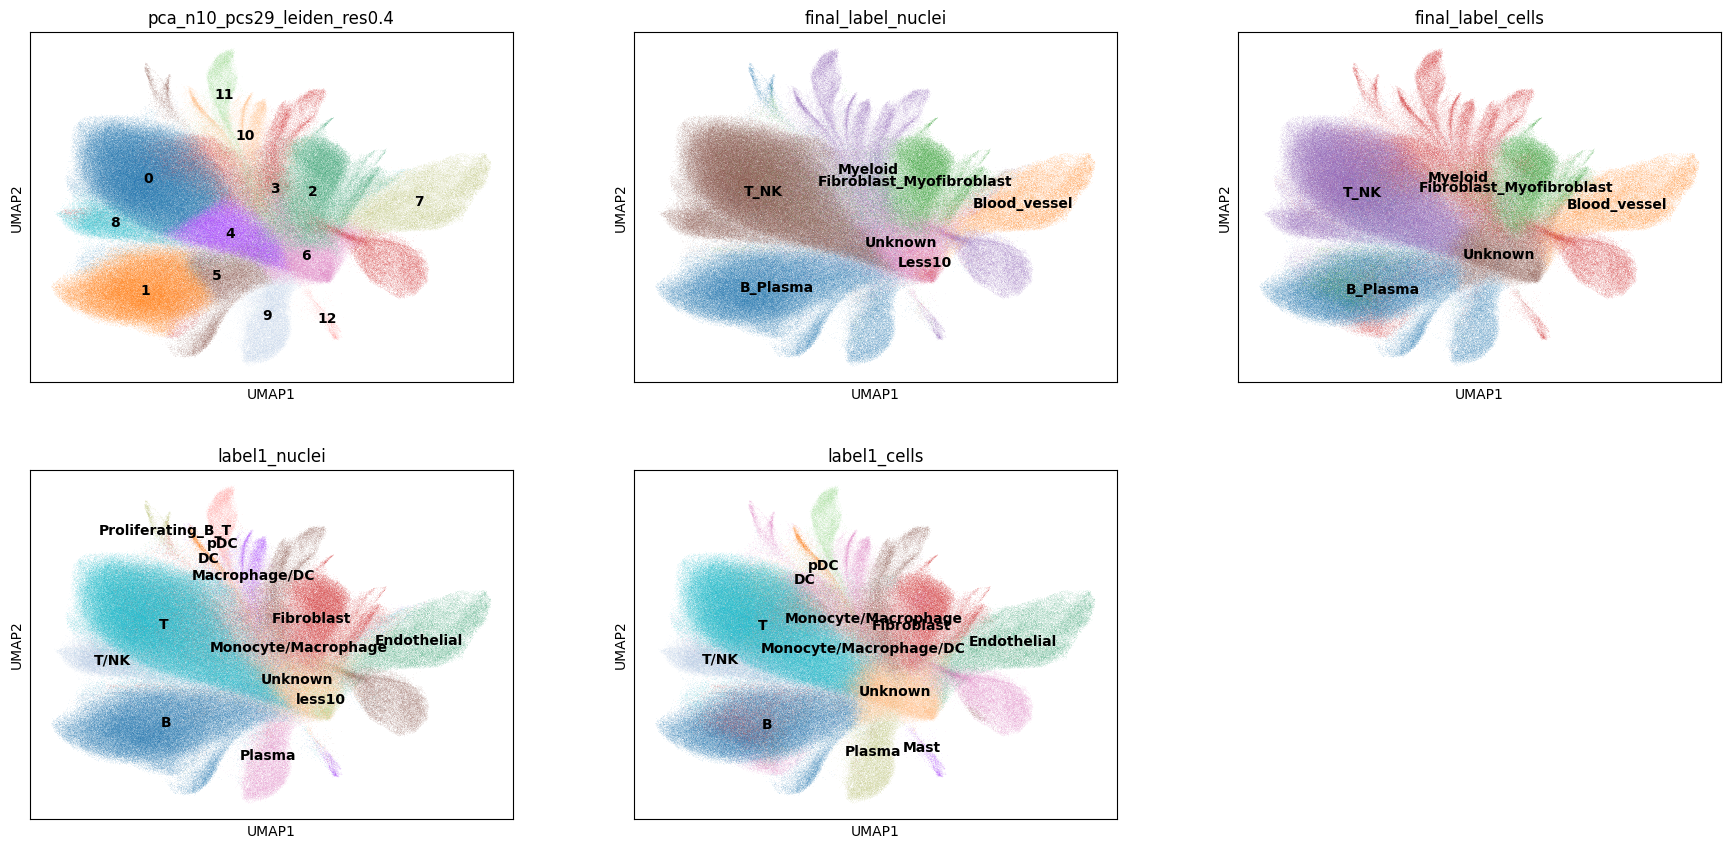

In [33]:
# Plot the clusters
sc.pl.umap(adata_combined, neighbors_key='pca_n10_pcs29',
           color=[clustering_label, 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells'],
           ncols=3, legend_loc='on data')

In [34]:
cluster_analysis_results = analyze_clusters(adata_combined, clustering_label)

for cluster_id, (dominant_cells, dominant_nuclei, _, _, diff_count_woUnknown, diff_count) in cluster_analysis_results.items():
    print("=" * 50)
    print(f"Cluster ID: {cluster_id}")
    print(f"Dominant final_label_cells: {dominant_cells}")
    print(f"Dominant final_label_nuclei: {dominant_nuclei}")
    print(f"Count of differing labels without 'Unknown/Less10' label for Nuclei: {round(diff_count_woUnknown, 2)} %")
    print(f"Count of differing labels: {round(diff_count, 2)} %\n")

Cluster ID: 0
Dominant final_label_cells: {'T_NK': 89.11641389825068, 'Myeloid': 6.130637136896165}
Dominant final_label_nuclei: {'T_NK': 92.33670357887979, 'Fibroblast_Myofibroblast': 3.868259508907077}
Count of differing labels without 'Unknown/Less10' label for Nuclei: 12.82 %
Count of differing labels: 12.97 %

Cluster ID: 1
Dominant final_label_cells: {'B_Plasma': 81.41467198788706, 'Fibroblast_Myofibroblast': 11.297935378950024}
Dominant final_label_nuclei: {'B_Plasma': 97.79050965951043, 'T_NK': 0.8103333862962997}
Count of differing labels without 'Unknown/Less10' label for Nuclei: 18.4 %
Count of differing labels: 18.6 %

Cluster ID: 2
Dominant final_label_cells: {'Fibroblast_Myofibroblast': 69.07017229461611, 'Unknown': 12.26287089424234}
Dominant final_label_nuclei: {'Fibroblast_Myofibroblast': 75.02368090934692, 'Unknown': 12.21678912470239}
Count of differing labels without 'Unknown/Less10' label for Nuclei: 21.93 %
Count of differing labels: 27.75 %

Cluster ID: 3
Dominan

/var/folders/ff/llzyqd_s78v1k8vywvjxp5_r0000gn/T/ipykernel_12472/1125182952.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_groups = adata.obs.groupby(resolution_key)


In [35]:
analyze_cluster_dominance(cluster_analysis_results)

Clusters where the top 1 for dominant_cells is 'Unknown' or 'Less10': ['6']
Clusters where the top 1 for dominant_cells differs from dominant_nuclei (excluding 'Unknown' and 'Less10'): ['6']
Clusters where diff_percentage_woUnknown is greater than 40%: []

Cluster ID: 6
Dominant final_label_cells: {'Unknown': 67.82514809302869, 'Myeloid': 21.649304035717414} - with dominant label1: {'Unknown': 67.82514809302869}
Dominant final_label_nuclei: {'Unknown': 62.19031777991771, 'Less10': 15.042750007295222} - with dominant label1: {'Unknown': 62.19031777991771}
Count of differing labels without 'Unknown' or 'Less10' label for Nuclei: 12.49 %
Count of differing labels: 44.59 %
% of cells in cluster: 4.91 %
-----


In [41]:
dict_combined_labels = assign_final_labels(cluster_analysis_results, {})
dict_combined_labels

{'0': 'T_NK',
 '1': 'B_Plasma',
 '2': 'Fibroblast_Myofibroblast',
 '3': 'Myeloid',
 '4': 'T_NK',
 '5': 'B_Plasma',
 '6': 'Unknown',
 '7': 'Blood_vessel',
 '8': 'T_NK',
 '9': 'B_Plasma',
 '10': 'Myeloid',
 '11': 'Myeloid',
 '12': 'Myeloid'}

In [42]:
adata_combined.obs['final_label_combined'] = adata_combined.obs[clustering_label].map(dict_combined_labels)
adata_combined.obs

region   slide     cell_id       area  \
aaaaaaaa-1  nucleus_boundaries  morpho  aaaaaaaa-1  44.569126   
aaaaaaab-1  nucleus_boundaries  morpho  aaaaaaab-1  20.071997   
aaaaaaac-1  nucleus_boundaries  morpho  aaaaaaac-1  26.416594   
aaaaaaad-1  nucleus_boundaries  morpho  aaaaaaad-1  21.200974   
aaaaaaae-1  nucleus_boundaries  morpho  aaaaaaae-1  22.329712   
...                        ...     ...         ...        ...   
aaaklhfh-1  nucleus_boundaries  morpho  aaaklhfh-1  18.333292   
aaaklhfi-1  nucleus_boundaries  morpho  aaaklhfi-1  11.695614   
aaaklhfj-1  nucleus_boundaries  morpho  aaaklhfj-1   6.322290   
aaaklhfk-1  nucleus_boundaries  morpho  aaaklhfk-1  11.764376   
aaaklhfl-1  nucleus_boundaries  morpho  aaaklhfl-1   7.563672   

                                  ct_tangram  transcript_counts  \
aaaaaaaa-1  Intermediate EPCAM+ erythroblast                148   
aaaaaaab-1    S100A+ preNeutrophil (cycling)                189   
aaaaaaac-1                Gamma-delta T cell                208   
aaaaaaad-1         pre-pDC (lymphoid origin)                200   
aaaaaaae-1               preB cell (cycling)                222   
...                                      ...                ...   
aaaklhfh-1           Tissue-resident NK cell                 80   
aaaklhfi-1                              MAIT                116   
aaaklhfj-1  Intermediate EPCAM+ erythroblast                 36   
aaaklhfk-1                        Fibroblast                 20   
aaaklhfl-1           CD14+MHCIIhigh monocyte                 66   

           transcript_cat        final_label_nuclei         final_label_cells  \
aaaaaaaa-1              3                   Myeloid                   Myeloid   
aaaaaaab-1              4                      T_NK                      T_NK   
aaaaaaac-1              5                      T_NK                      T_NK   
aaaaaaad-1              3                   Myeloid                   Myeloid   
aaaaaaae-1              2                  B_Plasma                  B_Plasma   
...                   ...                       ...                       ...   
aaaklhfh-1              0              Blood_vessel              Blood_vessel   
aaaklhfi-1              1  Fibroblast_Myofibroblast  Fibroblast_Myofibroblast   
aaaklhfj-1              0                      T_NK                   Unknown   
aaaklhfk-1              0                   Unknown                   Unknown   
aaaklhfl-1              0  Fibroblast_Myofibroblast  Fibroblast_Myofibroblast   

                  label1_nuclei            label1_cells  \
aaaaaaaa-1  Monocyte/Macrophage     Monocyte/Macrophage   
aaaaaaab-1                    T                       T   
aaaaaaac-1                    T                       T   
aaaaaaad-1                  pDC  Monocyte/Macrophage/DC   
aaaaaaae-1                    B                       B   
...                         ...                     ...   
aaaklhfh-1          Endothelial             Endothelial   
aaaklhfi-1           Fibroblast              Fibroblast   
aaaklhfj-1                    T                 Unknown   
aaaklhfk-1              Unknown                 Unknown   
aaaklhfl-1           Fibroblast              Fibroblast   

           pca_n10_pcs29_leiden_res0.4 pca_n10_pcs29_leiden_res0.6  \
aaaaaaaa-1                           3                           5   
aaaaaaab-1                           0                           0   
aaaaaaac-1                           0                           0   
aaaaaaad-1                           3                           5   
aaaaaaae-1                           1                           1   
...                                ...                         ...   
aaaklhfh-1                           6                           7   
aaaklhfi-1                           2                           4   
aaaklhfj-1                           4                           7   
aaaklhfk-1                           6                  

In [43]:
adata_combined.obs['final_label_combined'].value_counts(dropna=False)

final_label_combined
T_NK                        285167
B_Plasma                    164268
Myeloid                     102780
Fibroblast_Myofibroblast     78122
Unknown                      34269
Blood_vessel                 33610
Name: count, dtype: int64

In [44]:
# Create final table, adding cell_id with less than 10 transcripts

adata_nuclei_ini = sc.read_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_nuclei_ini_{slide_id}.h5ad")

adata_combined_missing = adata_nuclei_ini[~adata_nuclei_ini.obs_names.isin(adata_combined.obs_names)].copy()
adata_combined_missing.obs['final_label_combined'] = 'Less10'
adata_combined_missing.obs['final_label_nuclei'] = 'Less10'
adata_combined_missing.obs['final_label_cells'] = 'Less10'
print(adata_combined.shape[0] + adata_combined_missing.shape[0])

adata_combined_all = ad.concat([adata_combined, adata_combined_missing], join="outer", merge="first", uns_merge="first", pairwise=True)
print(adata_combined_all.shape[0])

702300
702300


In [45]:
# Clean memory
del adata_combined_missing, adata_nuclei_ini
gc.collect()

12

In [46]:
adata_combined_all

AnnData object with n_obs × n_vars = 702300 × 7092
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts', 'transcript_cat', 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells', 'pca_n10_pcs29_leiden_res0.4', 'pca_n10_pcs29_leiden_res0.6', 'pca_n10_pcs29_leiden_res0.8', 'final_label_combined'
    uns: 'pca', 'pca_n10_pcs29', 'umap', 'pca_n10_pcs29_leiden_res0.4', 'pca_n10_pcs29_leiden_res0.6', 'pca_n10_pcs29_leiden_res0.8', 'pca_n10_pcs29_leiden_res0.4_colors', 'pca_n10_pcs29_leiden_res0.6_colors', 'pca_n10_pcs29_leiden_res0.8_colors', 'final_label_cells_colors', 'final_label_nuclei_colors', 'transcript_cat_colors', 'label1_nuclei_colors', 'label1_cells_colors', 'sopa_attrs', 'spatialdata_attrs'
    obsm: 'X_pca', 'X_umap', 'spatial', 'tangram_pred'
    varm: 'PCs'
    obsp: 'pca_n10_pcs29_distances', 'pca_n10_pcs29_connectivities'

In [47]:
adata_combined_all.obs['final_label_combined'].value_counts(dropna=False)

final_label_combined
T_NK                        285167
B_Plasma                    164268
Myeloid                     102780
Fibroblast_Myofibroblast     78122
Unknown                      34269
Blood_vessel                 33610
Less10                        4084
Name: count, dtype: int64

In [48]:
sdata_final = sd.read_zarr(f"/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/sdata_final/sdata_{slide_id}.zarr", selection=('shapes',))

In [49]:
# Add in sdata final
sdata_final.tables['table_combined'] = adata_combined_all

In [50]:
adata_combined_all

AnnData object with n_obs × n_vars = 702300 × 7092
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts', 'transcript_cat', 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells', 'pca_n10_pcs29_leiden_res0.4', 'pca_n10_pcs29_leiden_res0.6', 'pca_n10_pcs29_leiden_res0.8', 'final_label_combined'
    uns: 'pca', 'pca_n10_pcs29', 'umap', 'pca_n10_pcs29_leiden_res0.4', 'pca_n10_pcs29_leiden_res0.6', 'pca_n10_pcs29_leiden_res0.8', 'pca_n10_pcs29_leiden_res0.4_colors', 'pca_n10_pcs29_leiden_res0.6_colors', 'pca_n10_pcs29_leiden_res0.8_colors', 'final_label_cells_colors', 'final_label_nuclei_colors', 'transcript_cat_colors', 'label1_nuclei_colors', 'label1_cells_colors', 'sopa_attrs', 'spatialdata_attrs'
    obsm: 'X_pca', 'X_umap', 'spatial', 'tangram_pred'
    varm: 'PCs'
    obsp: 'pca_n10_pcs29_distances', 'pca_n10_pcs29_connectivities'

In [51]:
# Convert in str the final_label_combined, final_label_cells and final_label_nuclei to see it in Napari
sdata_final.tables['table_combined'].obs['final_label_combined'] = sdata_final.tables['table_combined'].obs['final_label_combined'].astype(str)
sdata_final.tables['table_combined'].obs['final_label_cells'] = sdata_final.tables['table_combined'].obs['final_label_cells'].astype(str)
sdata_final.tables['table_combined'].obs['final_label_nuclei'] = sdata_final.tables['table_combined'].obs['final_label_nuclei'].astype(str)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


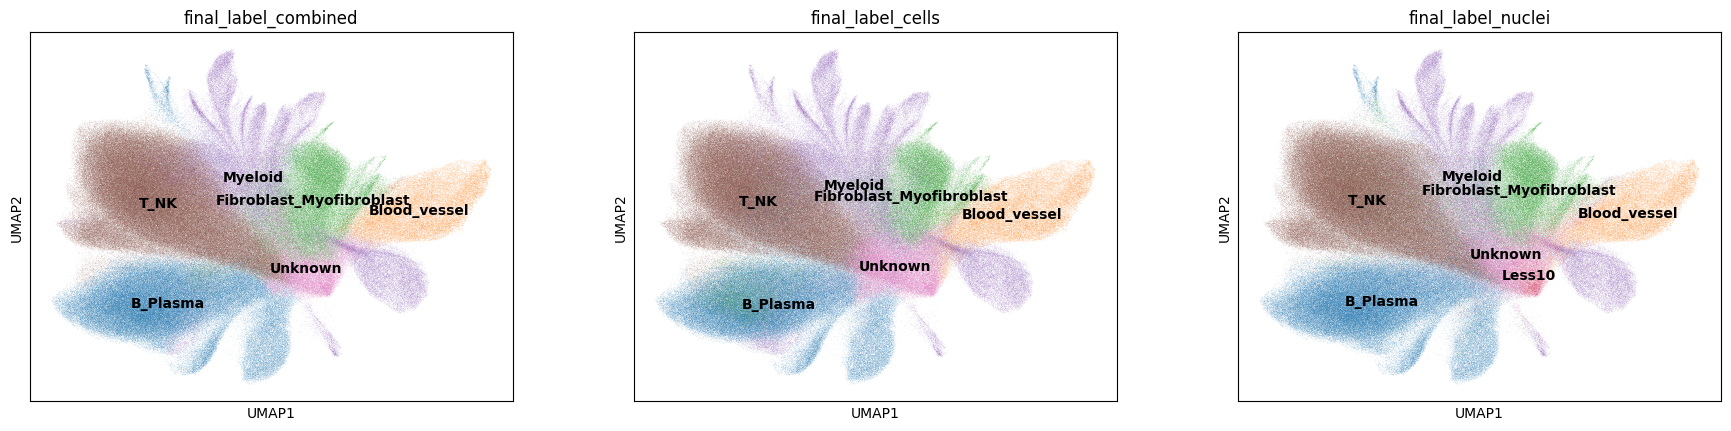

In [52]:
sc.pl.umap(sdata_final.tables['table_combined'], color=['final_label_combined', 'final_label_cells', 'final_label_nuclei'], ncols=3, legend_loc='on data')

In [53]:
# Put table_combined as annotating cell_boundaries

sdata_final["table_combined"].obs["region"] = "cell_boundaries"
sdata_final.tables["table_combined"].obs['region'] = sdata_final.tables["table_combined"].obs['region'].astype('category')
sdata_final.set_table_annotates_spatialelement(table_name="table_combined", region="cell_boundaries", region_key="region", instance_key="cell_id")

region, region_key, instance_key = get_table_keys(sdata_final["table_combined"])
print(region, region_key, instance_key)

cell_boundaries region cell_id


In [54]:
# Color for final label in Napari

to_hex = partial(colors.to_hex, keep_alpha=True)

# Normalize the RGB values to the range [0, 1] by dividing by 255
napari_color = {
                "T_NK": to_hex(to_rgba([255/255, 15/255, 15/255])[:3]),                      # Red
                "B_Plasma": to_hex(to_rgba([255/255, 143/255, 15/255])[:3]),                 # Orange
                "Myeloid": to_hex(to_rgba([255/255, 211/255, 15/255])[:3]),                  # Yellow
                "Blood_vessel": to_hex(to_rgba([70/255, 128/255, 0/255])[:3]),               # Dark Green
                "Fibroblast_Myofibroblast": to_hex(to_rgba([156/255, 255/255, 36/255])[:3]), # Light Green
                "Epithelial": to_hex(to_rgba([57/255, 208/255, 133/255])[:3]),               # Blue Green
                "Specialized": to_hex(to_rgba([69/255, 237/255, 255/255])[:3]),              # Turquoise
                "Melanocyte": to_hex(to_rgba([22/255, 169/255, 223/255])[:3]),               # Blue
                "Stem_like": to_hex(to_rgba([22/255, 69/255, 223/255])[:3]),                 # Dark Blue
                "Glioblastoma": to_hex(to_rgba([130/255, 55/255, 235/255])[:3]),             # Purple
                "Unknown": to_hex(to_rgba([0/255, 0/255, 0/255])[:3]),                       # Black
                "Less10": to_hex(to_rgba([143/255, 143/255, 143/255])[:3])                   # Grey
                }

sdata_final.tables['table_combined'].uns["final_label_combined_colors"] = napari_color
sdata_final.tables['table_combined'].uns["final_label_cells_colors"] = napari_color
sdata_final.tables['table_combined'].uns["final_label_nuclei_colors"] = napari_color

In [55]:
sdata_final.write_element("table_combined")